In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ssp = pd.read_csv('scriptsSouthPark.csv', encoding='latin1')

In [2]:
ssp.head(3) 

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n


In [3]:
ssp.tail(3)

,Season,Episode,Character,Line
70893,9,14,Stan,That's not disciprine.\n
70894,9,14,Randy,Right right. Does vodka count?\n
70895,9,14,Stan,Dad!\n


In [4]:
# Clear the character names
ssp.Character = ssp.Character.str.replace('Mr ', 'Mr. ')
ssp.Character = ssp.Character.str.replace(':|,|;','')

# Remove the repeating headers
ssp = ssp[ssp.Character!='Character']

# Convert season and episode to type int
ssp.Season = ssp.Season.astype(int)
ssp.Episode = ssp.Episode.astype(int)

# Sort the script file accoding to episode number
ssp.sort_values(['Season','Episode'],inplace=True)

# Determine the epsiode number for each episode 
episode_key = ssp.groupby(['Season','Episode'],as_index=False)['Line'].count()
episode_key['eNum']=range(1,len(episode_key.Line)+1)
ssp = ssp.merge(episode_key[['Season', 'Episode','eNum']],on=['Season','Episode'],how='left')

In [5]:
ssp.head(3) 

,Season,Episode,Character,Line,eNum
0,1,1,Boys,"School day, school day, teacher's golden ru...\n",1
1,1,1,Kyle,"Ah, damn it! My little brother's trying to fol...",1
2,1,1,Ike,Zeeponanner.\n,1


In [6]:
ssp.tail(3)

,Season,Episode,Character,Line,eNum
70876,18,10,Stan,"Yeah, I think that's great too.\n",257
70877,18,10,PewDiePie,"Alright bros, it look like we'll have to end i...",257
70878,18,10,PewDiePie,Oh! That's it bros. Show's over.\n,257


In [7]:
linesPerEp = ssp.groupby(['eNum']).count()
linesPerEp.head()

,Season,Episode,Character,Line
eNum,,,,
1,391,391,391,391
2,297,297,297,297
3,286,286,286,286
4,364,364,364,364
5,314,314,314,314


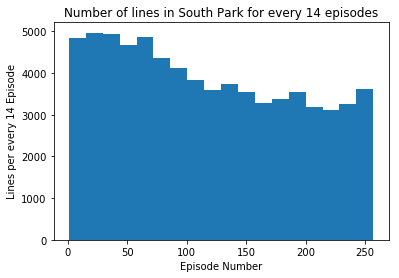

In [8]:
%matplotlib inline
plt.hist(ssp.eNum, bins=18) # Average length of a season is 14 episodes. 257 / 14 ~= 18
plt.xlabel('Episode Number')
plt.ylabel('Lines per every 14 Episode') 
plt.title('Number of lines in South Park for every 14 episodes')

In [9]:
linesPerChar = ssp[['Character','Line']].groupby(['Character']).count()
linesPerChar = linesPerChar.sort_values(['Line'], ascending=False)

In [10]:
linesPerChar[0:20]

,Line
Character,
Cartman,9774
Stan,7680
Kyle,7099
Butters,2602
Randy,2467
Mr. Garrison,1003
Chef,917
Kenny,881
Sharon,862


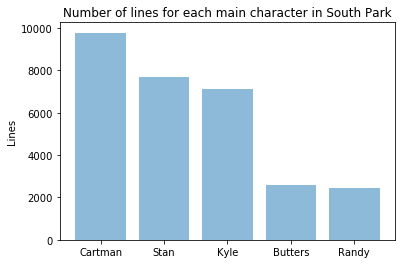

In [12]:
objects = ('Cartman','Stan','Kyle','Butters','Randy')
#'Mr. Garrison','Chef','Kenny','Sharon','Mr. Mackey','Gerald','Jimmy','Wendy','Liane','Sheila','Jimbo'
y_pos = np.arange(len(objects))

lines = [linesPerChar.Line[i] for i in range(0,5)]
 
barchart = plt.bar(y_pos, lines, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Lines')
plt.title('Number of lines for each main character in South Park')